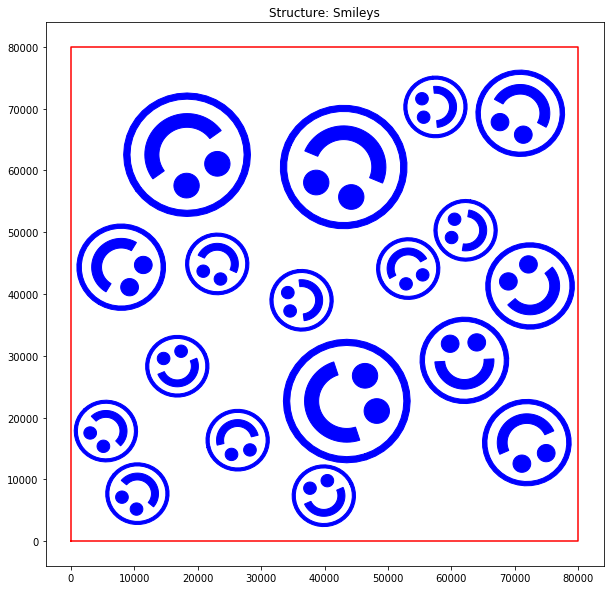

In [1]:
from libgds import gds
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tqdm
from matplotlib.patches import Ellipse

def CircleOverlap(C,circles,safety=0,ax=None):
    for c in circles:
        dx2=(float(C[0])-float(c[0]))**2
        dy2=(float(C[1])-float(c[1]))**2
        dist2 = dx2+dy2
        r2 = (C[2]+c[2]+safety)**2
        if dist2<r2:
            if ax is not None:
                ax.plot([c[0],C[0]],[c[1],C[1]],'r-')
                ax.add_patch(Ellipse([C[0],C[1]],C[2],C[2],color='red',linestyle='--',fill=False))
            return True
    return False

def smiley(g,pos,r,dosefactor=1):
    #g.addCircle(pos,r,40)
    pts=[]
    for n in range(41):
        pts+=[pos[0]+r*np.cos(np.pi*n/20.0),pos[1]+r*np.sin(np.pi*n/20.0)]
    for n in range(41):
        pts+=[pos[0]+.9*r*np.cos(-np.pi*n/20.0),pos[1]+.9*r*np.sin(-np.pi*n/20.0)]
    g.addPoly(pts,dose=dosefactor)
    g.addDisk((pos[0]+.3*r,pos[1]+.4*r),.2*r,40,dose=dosefactor)
    g.addDisk((pos[0]-.3*r,pos[1]+.4*r),.2*r,40,dose=dosefactor)
    pts=[]
    for n in range(41):
        pts+=[pos[0]+r*.444*np.cos(np.radians(180+n*180/40.)),pos[1]+r*.444*np.sin(np.radians(180+n*180/40.))]
    for n in range(41):
        pts+=[pos[0]+r*.666*np.cos(np.radians(-n*180/40.)),pos[1]+r*.666*np.sin(np.radians(-n*180/40.))]
    g.addPoly(pts,dose=dosefactor)
    
def RandomSmiley(g,Disks,size,seed=None,safety=500,dosefactor=1):
    circles=[]
    np.random.seed(seed)
    for r in Disks:
        for i in range(Disks[r]):
            o=True
            X=[]
            Y=[]
            while o:
                x,y = np.random.randint(r+safety,size-r-safety,2)
                o=CircleOverlap((x,y,r),circles,safety=safety)
            circles.append((x,y,r))
            g.uvSave()
            g.uvShift(x,y)
            g.uvRotate(np.random.randint(360))
            smiley(g,(0,0),r,dosefactor=dosefactor)
            g.uvRestore()
            
fig, ax = plt.subplots(1,1,figsize=(10,10))

size = 80000

AreaDose = 1 #C/m^2 = 100 uC/cm^2
LineDose = 1e-8 # C/m = 100 pC/cm
BeamCurrent = 30*1e-12 # A = 30 pA

g = gds.GDSII()
g.new('Smiley')

g.newStr('Smileys',ax=ax)
g.addFrame(0,0,size,size,dose=10)
RandomSmiley(g,{10000:3,7000:5,5000:10},size,1,dosefactor=5)
g.endStr()

g.endLib()

            